In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [7]:
df = pd.read_json('/Users/satenkun/Downloads/fake_news.json', lines=True)
df.head(5)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [9]:
df = df.drop(columns=['article_link'])

In [10]:
df.head(4)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...


In [11]:
fake_heads=df.headline[df.is_sarcastic==1].str.split()
fake1=pd.Series(df.headline[df.is_sarcastic==1])
fake_len=fake1.str.len()
fake_len.head(4)

0    61
3    52
4    61
7    88
Name: headline, dtype: int64

In [12]:
real_heads=df.headline[df.is_sarcastic==0].str.split()
real1=pd.Series(df.headline[df.is_sarcastic==0])
real_len=real1.str.len()
real_len.head(4)

1    79
2    49
5    20
6    42
Name: headline, dtype: int64

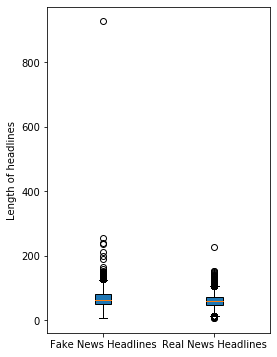

In [66]:
data_to_plot = [fake_len,real_len]
fig = plt.figure(1, figsize=(4, 6))
ax = fig.add_subplot(111)
ax.set_ylabel('Length of headlines')
ax.set_xticklabels(['Fake News Headlines', 'Real News Headlines'])
bp = ax.boxplot(data_to_plot,patch_artist=True)

the      4593
to       4065
of       2462
a        2443
in       2417
for      1881
and      1631
is       1494
on       1318
trump     957
with      943
you       732
this      690
new       664
from      661
at        644
about     644
how       639
your      575
are       555
dtype: int64


<AxesSubplot:title={'center':'TOP 20 WORDS - REAL NEWS'}>

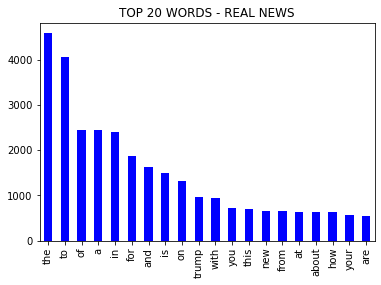

In [13]:
realh = pd.Series(' '.join(df.headline[df.is_sarcastic==0]).lower().split()).value_counts()
realh=realh.head(20)
print (realh)
realh.columns=["Words","Frequency"]
realh.plot(x='Words',y='Frequency',title= 'TOP 20 WORDS - REAL NEWS',kind='bar',color='blue')

to       4980
of       3790
in       2104
for      1736
on       1286
man      1143
with     1008
new       973
by        730
the       688
at        673
from      664
a         622
out       559
after     546
up        507
he        499
area      487
about     483
as        482
dtype: int64


<AxesSubplot:title={'center':'TOP 20 WORDS - FAKE NEWS'}>

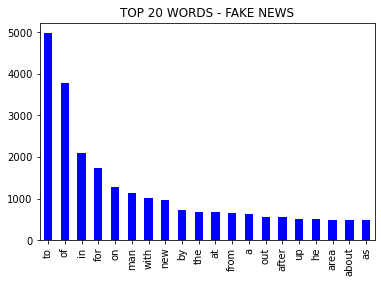

In [14]:
fakeh = pd.Series(' '.join(df.headline[df.is_sarcastic==1]).lower().split()).value_counts()
fakeh=fakeh.head(20)
print (fakeh)
fakeh.columns=["Words","Frequency"]
fakeh.plot(x='Words',y='Frequency',title= 'TOP 20 WORDS - FAKE NEWS',kind='bar',color='blue')

In [15]:
x= df['headline']
y= df['is_sarcastic']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10)

In [17]:
from pandas import DataFrame

In [18]:
export_csv = x_train.to_csv (r'x_train.csv', index = None, header=True)
export_csv = x_test.to_csv (r'x_test.csv', index = None, header=True)
export_csv = y_test.to_csv (r'y_test.csv', index = None, header=True)
export_csv = y_train.to_csv (r'y_train.csv', index = None, header=True)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english")

In [20]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [21]:
y_train.head(2)

21120    1
20048    1
Name: is_sarcastic, dtype: int64

In [22]:
myx = x_train.toarray()
bagword = vectorizer.get_feature_names()

In [23]:
a = myx.sum(axis=0)
top20 = np.argpartition(a,-20)[-20:]
print (top20)

[13671 22709 17890 15010 14248 11936 20741 21169 11911 12414 14111 11163
 13815  6235 17028 22659 22662  1234  5296 22841]


In [24]:
topfrequency=[]
word20=[]

for iteri in top20:
    topfrequency.append(a[iteri])
    word20.append(bagword[iteri])
    
print (word20)
print (topfrequency)

['nation', 'world', 'says', 'people', 'old', 'like', 'time', 'trump', 'life', 'man', 'obama', 'just', 'new', 'donald', 'report', 'woman', 'women', 'area', 'day', 'year']
[311, 312, 355, 318, 319, 336, 370, 1375, 315, 1157, 323, 497, 1255, 361, 455, 404, 314, 384, 385, 434]


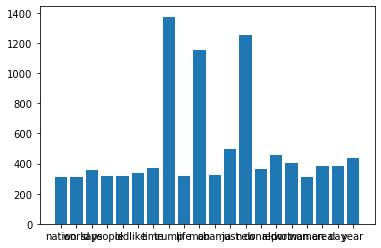

In [25]:
plt.xticks(np.arange(20),word20)
plt.bar(np.arange(20),topfrequency)
plt.rcParams["figure.figsize"] = (12,9)
plt.show()

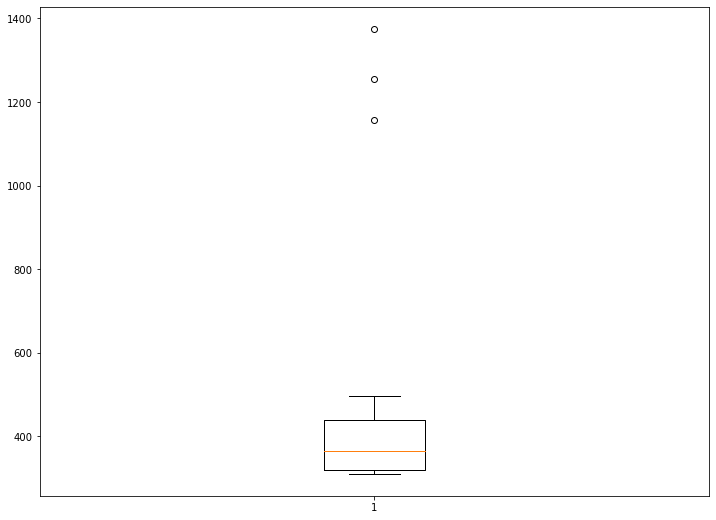

In [26]:
plt.boxplot(topfrequency)
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [29]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
pred=model.predict(x_train)

In [31]:
LRtraining_score = accuracy_score(pred,y_train)
LRtraining_score

0.9515933656354827

In [32]:
model_path = "/Users/satenkun/Documents/Meng/DAandML/LRmodel.pickle"
pickle.dump(model, open(model_path, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/satenkun/Documents/Meng/DAandML/LRmodel.pickle'

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_train)

array([[10778,   579],
       [  460,  9647]])

In [34]:
pred_test = model.predict(x_test)

In [35]:
LRtest_accuracy = accuracy_score(pred_test,y_test)
LRtest_accuracy

0.8012578616352202

In [36]:
confusion_matrix(pred_test, y_test)

array([[3177,  852],
       [ 570, 2556]])

In [37]:
from sklearn.naive_bayes import MultinomialNB
mltinb = MultinomialNB()

In [38]:
mltinb.fit(x_train,y_train)

MultinomialNB()

In [39]:
xpred=mltinb.predict(x_train)

In [40]:
MNBtrain_accuracy= accuracy_score(xpred,y_train)
MNBtrain_accuracy

0.9111535594483787

In [41]:
confusion_matrix(xpred, y_train)

array([[10279,   948],
       [  959,  9278]])

In [42]:
xpred_test=mltinb.predict(x_test)

In [43]:
MNBtest_accuracy = accuracy_score(xpred_test,y_test)
MNBtest_accuracy

0.802795248078267

In [44]:
confusion_matrix(xpred_test, y_test)

array([[3076,  740],
       [ 671, 2668]])

In [43]:
model_path = "/Users/satenkun/Documents/Meng/DAandML/Multinb.pickle"
pickle.dump(mltinb, open(model_path, 'wb'))

In [45]:
from sklearn.neighbors import KNeighborsClassifier

kneigh = KNeighborsClassifier(n_neighbors=3)

kneigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
kpred=kneigh.predict(x_train)

In [47]:
KNNtrain_accuracy = accuracy_score(kpred,y_train)
KNNtrain_accuracy

0.6519288110324264

In [48]:
confusion_matrix(kpred, y_train)

array([[11223,  7456],
       [   15,  2770]])

In [49]:
kpred_test=kneigh.predict(x_test)

In [50]:
KNNtest_accuracy = accuracy_score(kpred_test,y_test)
KNNtest_accuracy

0.5658979734451433

In [51]:
confusion_matrix(kpred_test, y_test)

array([[3681, 3040],
       [  66,  368]])

In [51]:
model_path = "/Users/satenkun/Documents/Meng/DAandML/KNNModel.pickle"
pickle.dump(kneigh, open(model_path, 'wb'))

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfor = RandomForestClassifier(n_estimators=2, random_state=2)

In [53]:
rfor.fit(x_train,y_train)

RandomForestClassifier(n_estimators=2, random_state=2)

In [54]:
rpred=rfor.predict(x_train)

In [55]:
RFtrain_accuracy = accuracy_score(rpred,y_train)
RFtrain_accuracy

0.8653093551994037

In [56]:
confusion_matrix(rpred, y_train)

array([[11064,  2717],
       [  174,  7509]])

In [57]:
rpred_test=rfor.predict(x_test)
RFtest_accuracy = accuracy_score(rpred_test,y_test)
RFtest_accuracy

0.6775681341719078

In [58]:
confusion_matrix(rpred_test, y_test)

array([[3383, 1943],
       [ 364, 1465]])

In [59]:
model_path = "/Users/satenkun/Documents/Meng/DAandML/RFmodel.pickel"
pickle.dump(rfor, open(model_path, 'wb'))

In [59]:
from sklearn.metrics import roc_auc_score
rfscore=roc_auc_score(rpred_test, y_test)

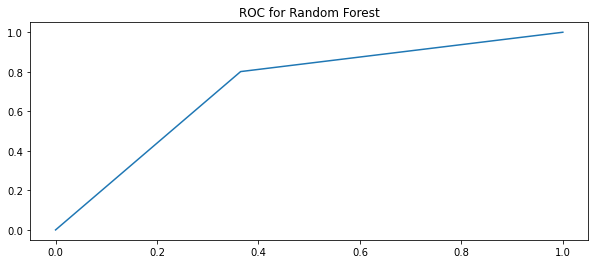

In [60]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(rpred_test, y_test)
plt.title('ROC for Random Forest')
plt.plot(fpr,tpr,rfscore)

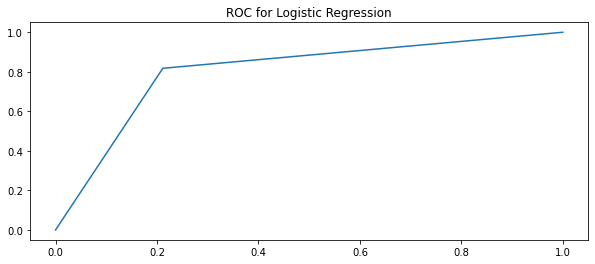

In [61]:
#for Logistic Regression
lrscore=roc_auc_score(pred_test, y_test)
fpr, tpr, thresholds = metrics.roc_curve(pred_test, y_test)
#plt.xlabel('')
#plt.ylabel('')
plt.title('ROC for Logistic Regression')
plt.plot(fpr,tpr,lrscore)

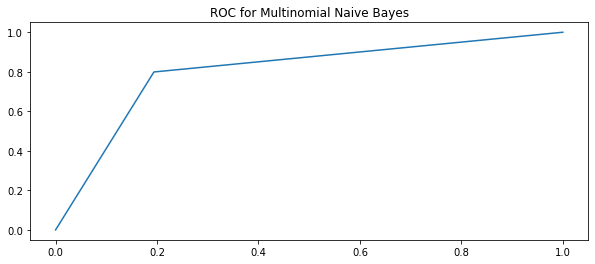

In [62]:
#for Multinomial Naive Bayes
mnbscore=roc_auc_score(xpred_test, y_test)
fpr, tpr, thresholds = metrics.roc_curve(xpred_test, y_test)
plt.title('ROC for Multinomial Naive Bayes')
plt.plot(fpr,tpr,mnbscore)

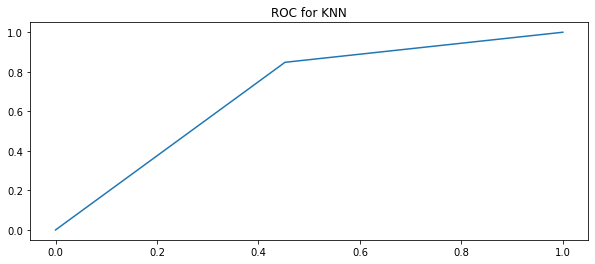

In [63]:
#for KNN
knnscore=roc_auc_score(kpred_test, y_test)
fpr, tpr, thresholds = metrics.roc_curve(kpred_test, y_test)
plt.title('ROC for KNN')
plt.plot(fpr,tpr,knnscore)